For this cheat sheet, we will be working with the Grocery Store data we have imported in the previous workbook. Let's import it here (we can use the same code as from the previous module):

In [ ]:
import pandas as pd
import os
from os.path import curdir

# This time we will give our variables more meaningful names.
# This is significantly improves code readability.
grocery_data_path = os.path.join(curdir,'Data','MMA_860_Grocery_Data.csv')
grocery_data = pd.read_csv(grocery_data_path, header='infer', index_col='Obs')

As a Data Scientist you will find that most of your time is spent on data acquisition and data prep long before you are able to begin modelling. This is a sad truth, but not one worth complaining about. Instead, we are going to learn some Python functions that simplify the data exploration and cleaning portion of the Model Development Cycle. Specifically, let us look into...

# Anaconda Distribution

The Anaconda Distribution comes pre-loaded with many libraries, majority of which are very useful for data analysis and data wrangling. The libraries mentioned above are just a few examples but will be the main focus of this course. See below for a more concise definition of each.

**pandas** - An open-sourced library providing a simple interface for data analysis. You have already imported data using this library. I like to think of this library as a command-line version of Microsoft Excel as it shares many of the features.

**NumPy** - A library used for numerical analysis. Where pandas key purpose is structuring data, filtering columns, and joining tables, NumPy is used for actual computation.

**MatPlotLib** - A library used for data visualization. MatPlotLib can be used to generate several plots from given NumPy arrays and Pandas series.

**SciPy** - A library used for scientific computation. It has a comprehensive stats library which we will use in this course.

**scikit-learn** - A library used to make machine learning models such as linear regression, logistic regression, and neural networks.

These libraries are closely related and there is some overlap with their functions. For example, you are able to generate plots using pandas.

# A Deeper Dive into Pandas

## Processing our Input

We explored some functions at the end of the last notebook related to getting snapshots of our data. I want to call attention to two of these functions: $\text{describe}$ and $\text{dtype}$.

In [ ]:
grocery_data.describe()

In [ ]:
grocery_data.dtypes

If we look at the $\text{describe}$ output, we will notice that Grocery_Bill and Family_Income were not included. The $\text{dtypes}$ output tells us why: Pandas thinks these are 'objects' and not 'integers' ($\text{int64}$ is short for 64-bit integer). This is because our data had a dollar sign infront of it; this must be resolved if we want to do any calculations with these values. The below code performs the required conversion.

In [ ]:
#First declare a function that removes a dollar sign from a string.
def remove_dollar_sign(s):
    '''
    The Python String replace function can be used to replace any
    instances of a substring in a string with another substring.
    In this case, we are replacing "$" with "" (an empty string);
    this effectively gets rid of any dollar signs in your string.
    '''
    return s.replace("$","")

'''
Now we must apply this function to each value in the 'Grocery_Bill'
column. We can index the column of interest like so:
'''
grocery_data['Grocery_Bill'].head()

In [ ]:
'''
Now, to apply a function to all entries in this column, we must
use the pandas map function.
'''
grocery_data['Grocery_Bill'] = grocery_data['Grocery_Bill'].map(
    remove_dollar_sign)

In [ ]:
'''
Although our columns values are now in the proper format, pandas still 
thinks that this column is filled with strings. We must explicitly tell
pandas that this column is filled with floats (decimal numbers). We do
this with the 'astype' function.
'''
grocery_data['Grocery_Bill'] = grocery_data['Grocery_Bill'].astype(
    'float64')

In [ ]:
'''
Family_Income contains a leading dollar sign as well as commas. We must
write an additional function to remove the commas. We can reuse the general
format from the dollar sign.
'''
def remove_comma(s):
    return s.replace(",","")

'''
Map the functions in the exact same way as in the 'Grocery_Bill' example. Note
that we can 'double map' by appending another map function. We then append 
'astype' and encode the values as integers. Encoding as float64 is also
acceptable.
'''
grocery_data['Family_Income'] = grocery_data['Family_Income'].map(
    remove_dollar_sign).map(remove_comma).astype('int64')

In [ ]:
'''
All data is now in a workable dtype and we will be able to perform 
operations on all the data.
'''
grocery_data.dtypes

## Filtering Data

Pandas has several useful tools for working with data – filtering, sorting, selecting, modifying, summarizing, and sampling.

*Filtering* allows you to select certain *rows* of data (i.e., observations). In this dataset, perhaps you are interested in only a subset of observations – let’s say those with no cars, and no kids. I find that the simplest way to filter in Pandas is to index columns directly. This is best explained through an example. Note, that I used the $\text{head()}$ function to surpress the output to 5 rows; unless otherwise stated, that is its sole purpose. 

In [ ]:
'''
The following code gives a data series where the
value is true in all the corresponding rows where 
N_Children = 0. I used the head() function to 
suppress the output to 5 rows. Unless otherwise
stated
'''
(grocery_data['N_Children'] == 0).head()

In [ ]:
#Applying the above condition as a filter is done like so

grocery_data[(grocery_data['N_Children'] == 0)].head()

If we wish to combine multiple conditions, like mentioned above, a boolean 'AND' operator must be used. Our two conditions are $\text{N_Children} = 0$ and $\text{N_Vehicles} = 0$.

In [ ]:
filtered_grocery_data = grocery_data[
    (grocery_data['N_Children'] == 0) & (grocery_data[
        'N_Vehicles'] == 0)]

filtered_grocery_data.head()

## Sorting

You can also use $\text{sort_values}$ on the dataframe and present it in a new order. You can sort by as many columns as you’d like. I often think of this as being very similar to Excel’s sort function. In this case, let’s sort Grocery Data to be descending by Grocery_Bill. Print the first 10 rows and observe the order (Hint: you can tell the head command how many rows to print).

In [ ]:
arranged_grocery_data = grocery_data.sort_values(
    'Grocery_Bill', ascending=False)

arranged_grocery_data.head()

## Selecting and Slicing

Select is used to select certain columns of data (i.e., variables). It works much the same way as Arrange. In this case, let’s select for only grocery bill, family size and family income. You’ll notice we get all the rows (observations) but only the columns we selected. We index the dataframe like so:

In [ ]:
selected_grocery_data = grocery_data[
    ['Grocery_Bill','Family_Income','Family_Size']]
selected_grocery_data.head()

## More with Pandas

1) Add a new column that contains the percentage of income spent on each grocery purchase. Hint: dataframe.assign will be useful.

2) Create a new dataframe named my_test_frame that is a 30% random sample of the original file. 

3) Summarize the average distance to store


**Next, spend some time with the pandas documentation and the current data set:**

The Application Programming Interface (API) can be found here: https://pandas.pydata.org/pandas-docs/stable/reference/index.html

Do not be discouraged by the volume of functions that exist in this library; the best developers Google basics almost daily so don't worry if you are relying heavily on the reference!

## More with Pandas - Solutions 

### Question 1

In [ ]:
'''
Using the assign function, we pass an argument containing the new column name
(note it is not defined as a string) and set it equal to the approprate indexed
columns divided by each other.
'''
grocery_data = grocery_data.assign(
    Percentage_Income = grocery_data['Grocery_Bill'] 
    / grocery_data['Family_Income'])

grocery_data[['Grocery_Bill','Family_Income','Percentage_Income']].head()

Find out more about the assign function here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.assign.html

### Question 2

In [ ]:
'''
This question can be done with the Pandas 'sample' function using the frac
argument to dictate the proportion you want to keep. We then call the shape
property on the old and new dataframe to see if the new one is indeed 30% of
the size
'''

my_test_frame = grocery_data.sample(frac = 0.3)
my_test_frame.shape[0]/grocery_data.shape[0]

Find out more about the sample and shape functions at the below links, respectively:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

### Question 3 

In [ ]:
'''
This question can be done by calling the mean function on the Distance_to_Store
data series.
'''
grocery_data['Distance_to_Store'].mean()

Find out more about the mean function here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html

# MatPlotLib

MatPlotLib is a Python library used to produce graphs and other data visualizations. In general, a function takes a minimum two arguments: the x axis data, the y axis data. There are also several other optional arguments that dictate how the chart will look. Check out this link for the documentation for the matplotlib scatterplot function:

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

Let’s say we are interested in discovering the relationship between grocery spend and family income. How would you represent the data? Try coding it in Python to look like the plot below. What do you notice about the plot? How would you describe the data?

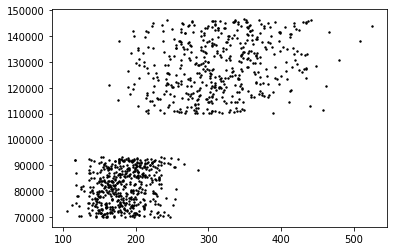

Scroll down when you are ready to see the solution.

In [ ]:
import matplotlib.pyplot as plt

'''
The x and y data that are applied in the scatter
function are indexed straight from the pandas 
Dataframe. Additionally, 's' modifies the point
size and 'c' modifies the point colour.
'''
plt.scatter(grocery_data['Grocery_Bill'],
    grocery_data['Family_Income'],s=2,c='black')

plt.show()

We can make this plot 'fancier' by applying additional properties. Run the below code and spend some time to figure out how it works and what line does what.

In [ ]:
fig = plt.figure()
scatter = plt.scatter(
    grocery_data['Grocery_Bill'],grocery_data['Family_Income'],
    s=1,c=grocery_data['Family_Size'])
fig.suptitle('Grocery Bill vs. Family Income')
plt.ylabel("Family Income")
plt.xlabel("Grocery Bill")
#plt.xlim(0,600)
#plt.ylim(0,180000)
cbar = plt.colorbar(scatter)
cbar.ax.set_ylabel('Number of Children')
plt.show()

Hint: If this code isn’t working and you get an error, make sure you have run all the code earlier in the cheat sheet – it’s likely the case that the Grocery Bill and Family Income variables are still ‘objects’. 

**Also, take a look at some of the awesome visualizations other people make. Many of these are beyond the scope of this course, but are cool.**

https://matplotlib.org/gallery/index.html

# Tidying Data - Long and Wide Data Formats 

Pandas has two functions for tidying data you should be aware of - $\text{pivot()}$ and $\text{melt()}$. Both make it easy to create a tidy data set. That is, a dataset that is long and not wide, with all columns representing variables and all rows containing observations.

The Grocery Store data set is already tidy, so for this we will need to use a different example. It is easy to create some data using NumPy. In this case, let’s create a dataset with 10 observations of 3 stocks.

In [ ]:
#First we import numpy and assign it to np
import numpy as np

'''
Assign variable to desired dataset size; 
in all cases this dictates the size of the
arrays produced
'''
data_size = 5

#We generate a series column of dates that are one day apart
dti = pd.date_range('2018-01-01',periods=data_size, freq = 'd')

#Generate 3 numpy arrays with normally distributed numbers
#S1: mean of 50, std dev of 10
S1 = np.random.normal(size=data_size,loc=50,scale=10)
S2 = np.random.normal(size=data_size,loc=10,scale=0.5)
S3 = np.random.normal(size=data_size,loc=1,scale=1)

In [ ]:
#Create a dataframe explicitly using the dataframe function
stocks_data = pd.DataFrame({'Date':dti,'Stock 1': S1,
              'Stock 2': S2,'Stock 3': S3})
stocks_data

Using the melt function, change the structure of the dataset to have each row contain only one specific stock. Then, use the pivot function to bring it back to the original structure. The structure of the code is below:

You can find the documentation for the two functions at the following links:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html

In [ ]:
'''
We put the sheet in the long format by applying the
melt function and keeping the date variable.
'''
long = pd.melt(stocks_data,id_vars='Date')
long.head()

In [ ]:
'''
The pivot function reverts the data into a wide format. We
specify that the columns are dictated by the values under
the column "variable" in the 'long' dataframe and that the
values for each variable are stored under the column called
'values'.
'''
long.pivot(index='Date',columns='variable',values='value')

# String Manipulation

For dealing with whitespace and occasional strange characters in strings, Python has many built-in useful functions. Often, I find that exported data contains leading spaces or 0s, especially as it relates to customer numbers.

For example, Queen’s increased the length of employee/student IDs by one digit – this means that all old IDs will have a leading 0. If you import these IDs as a number, the leading 0 will be dropped. Another example would be strings or numbers with a leading space. Observations with a leading space makes it very difficult to join and even more difficult to use any numerical functions. 

## Trim Operations

In [ ]:
'''
The function strip will remove all leading
and trailing whitespace in a string.
'''
string = "    hello   "
print("Before:",string,"<end>")
print("After:",string.strip(),"<end>")

In [ ]:
'''
Additionally, lstrip and rstrip will remove
only leading or only trailing white space 
respectively.
'''

print("Before:", string,"<end>")
print("lstrip:", string.lstrip(),"<end>")
print("rstrip:", string.rstrip(),"<end>")

## Padding Operations 

In [ ]:
'''
The functions ljust and rjust can be used to
fill the left and right side of the string with
some character.
'''

string = 'padleft'

#The first argument is the length of the resulting string
#The second argument is the character to be padded
print(string.ljust(10,'0'))

Try writing your own code using $\text{rjust()}$ as it takes very similar arguments. You can start by substituting 'ljust' for 'rjust' in the code above. You can also find additional information on string manipulation in Python here:

https://docs.python.org/3/library/stdtypes.html

# Handling Dates

Dates are a tricky data type to work with. Incorporate time and it becomes even more complex. Different tools store time in different formats, or in different DMY orders. Some countries have different time formats. Either of these differences can make time data very difficult to use. Pandas can read a variety of time data and manipulate it into a single format.The function $\text{to_datetime()}$ is useful for converting these to Pandas Dates. By setting the two parameters 'dayfirst' and 'yearfirst' to the appropriate value, you can parse different date formats. Note how the below outputs are all the same.

In [ ]:
pd.to_datetime('05/11/2018')

In [ ]:
pd.to_datetime('11/05/2018',dayfirst=True)

In [ ]:
pd.to_datetime('2018/05/11',yearfirst=True)

See the following link for documentation on the function:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html